In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data1 = [
    # Опыт 1 (Cф=0.1)
    [0.1, 2, 2, 2,        10.9, 17.8, 37.0, 36.0, 17.6],
    [0.1, 10, 10, 10,     25.2, 5.5,  49.2, 44.4,  5.9],
    [0.1, 50, 50, 50,     27.1, 3.0,  51.0, 47.1,  3.3],
    [0.1, 250, 250, 250,  28.6, 2.5,  50.0, 48.3,  2.6],
    [0.1, 500, 500, 500,  28.8, 2.4,  51.9, 47.8,  2.6],
    
    # Опыт 2 (Cф=0.3)
    [0.3, 2, 2, 2,        10.9, 18.3, 37.5,  35.1, 17.9],
    [0.3, 10, 10, 10,     24.3, 9.0,  50.4,  41.4,  9.3],
    [0.3, 50, 50, 50,     26.4, 7.0,  51.8,  43.5,  7.3],
    [0.3, 250, 250, 250,  27.0, 7.0,  52.5,  44.0,  7.3],
    [0.3, 500, 500, 500,  26.3, 7.0,  52.8,  44.0,  7.3],
    
    # Опыт 3 (Cф=0.5)
    [0.5, 2, 2, 2,        10.9, 18.8, 37.3, 34.0, 18.4],
    [0.5, 10, 10, 10,     23.4, 13.6, 50.5, 37.3, 13.9],
    [0.5, 50, 50, 50,     24.6, 13.0, 51.9, 39.2, 12.8],
    [0.5, 250, 250, 250,  25.4, 13.2, 51.8, 39.4, 13.0],
    [0.5, 500, 500, 500,  25.7, 13.3, 52.9, 39.3, 13.1],
    
    # Опыт 4 (Cф=1)
    [1.0, 2, 2, 2,        9.8,  20.7, 39.2, 31.2, 20.6],
    [1.0, 10, 10, 10,     18.4, 22.7, 47.4, 29.1, 21.9],
    [1.0, 50, 50, 50,     18.1, 21.9, 47.7, 29.6, 21.4],
    [1.0, 250, 250, 250,  18.9, 22.6, 47.1, 29.3, 21.7],
    [1.0, 500, 500, 500,  19.0, 22.8, 48.0, 29.2, 21.8],
    
    # Опыт 5 (Cф=10)
    [10.0, 2, 2, 2,       7.7,  23.9, 37.1, 29.3, 23.0],
    [10.0, 10, 10, 10,    12.8, 26.2, 42.0, 25.1, 25.8],
    [10.0, 50, 50, 50,    12.7, 26.1, 42.0, 25.6, 25.4],
    [10.0, 250, 250, 250, 12.9, 26.3, 42.3, 25.4, 25.6],
    [10.0, 500, 500, 500, 12.9, 26.3, 42.1, 25.3, 25.6],
    
    # Опыт 6 (Замыкание фазы на землю, Cф=0.5)
    [0.5, 2, 2, 2, 24.0, 47.5, 2.4, 46.2, 46.2],
    [0.5, 500, 50, 500, 25.8, 49.1, 1.3, 47.5, 47.3],
    [0.5, 500, 500, 500, 25.6, 49.0, 1.3, 47.4, 47.4]
]

data2 = [
    # Опыт 1
    [None,  10, 50, 50, 50, 9.2, 19.1, 36.4, 34.4, 18.9],
    [0.1,   10, 50, 50, 50, 30.7, 0.0, 51.0, 51.4, 0.0],
    [10.0,  10, 50, 50, 50, 30.2, 0.0, 51.0, 51.1, 0.0],
    [100.0, 10, 50, 50, 50, 27.4, 3.1, 51.2, 46.7, 3.3],
    
    # Опыт 2
    [None,   0.5, 2, 2, 2, 24.0, 47.1, 2.5, 46.3, 45.6],
    [0.1,    0.5, 2, 2, 2, 23.9, 5.8, 43.4, 48.3, 6.0],
    [10.0,   0.5, 2, 2, 2, 16.2, 15.3, 34.2, 45.0, 15.2],
    [100.0,  0.5, 2, 2, 2, 15.8, 37.2, 12.3, 43.4, 36.4],
    
    # Замыкание фазы В на землю (Rз=10 Ом)
    [10.0,   0.5, 2, 2, 2, 16.2, 15.3, 34.2, 45.0, 15.2],
    [10.0,   0.5, 500, 500, 500, 16.8, 15.1, 34.2, 45.9, 15.0]
]

data1 = np.array(data1, dtype=np.float32)
data2 = np.array(data2, dtype=np.float32)

In [11]:
Rh = 1000
Gh = 0.001
f = 50
w = 2 * np.pi * f
Rzaz = 100

In [30]:
def calculate_Uh(Uf, Cf, Ra, Rb, Rc):
    a = (Uf / 2)
    b = 9*((1/Rb + 1/Rc)**2) + (np.sqrt(3)*(1/Rb - 1/Rc) + 6*w*Cf)**2
    c = (1/Rb + 1/Rc + 1/Ra + 1/Rh + 1/Rzaz)**2 + (3*w*Cf)**2

    return a * np.sqrt(b / c)

In [31]:
Cf = 0.5 * 1e-6
#Ra = Rb = Rc = 2 * 1000
Ra = 500 * 1000
Rb = 50 * 1000
Rc = 500 * 1000

uf = 29
calculate_Uh(uf, Cf, Ra, Rb, Rc)


1.2824275233019184

# 1. Анализ условий опасности прямого прикосновения в сети IT

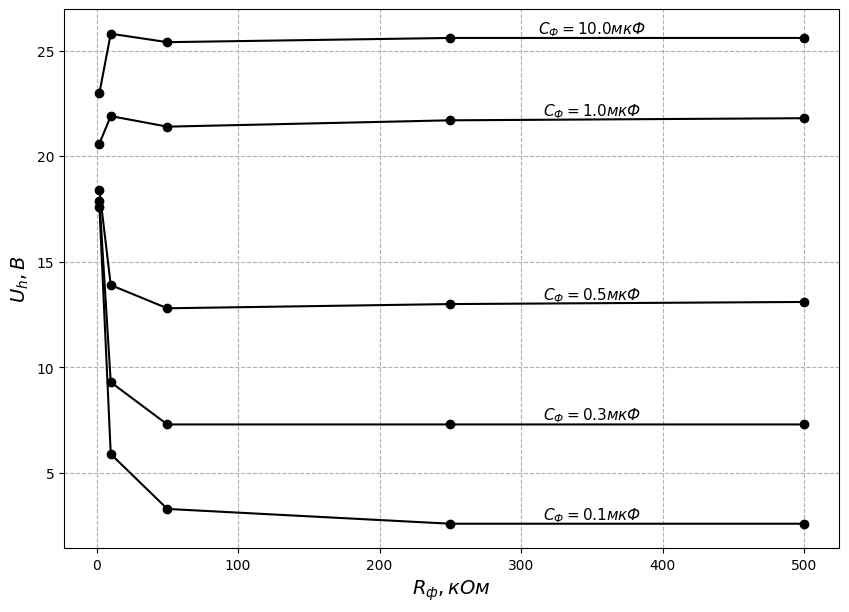

In [ ]:
N = 5
Cf_values = data1[::N, 0]
Rf_points = [data1[i*N:(i+1)*N, 1] for i in range(N)]
Uh_values = [data1[i*N:(i+1)*N, -1] for i in range(N)]

plt.figure(figsize=(10, 7))

for Cf, Rf, Uh in zip(Cf_values, Rf_points, Uh_values):
    plt.plot(Rf, Uh, marker='o', color=(0, 0, 0))

    plt.text(350, Uh[3], fr"$С_Ф = {Cf:.1f} мкФ$", 
         fontsize=11, ha='center', va='bottom',
         backgroundcolor='white',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', pad=1)
         )

plt.xlabel(r"$R_ф, кОм$", fontsize=14)
plt.ylabel(r"$U_{h}, В$", fontsize=14)
plt.grid(True, linestyle='dashed')
plt.show()

# 2. Анализ условий безопасности при непрямом прикосновении.

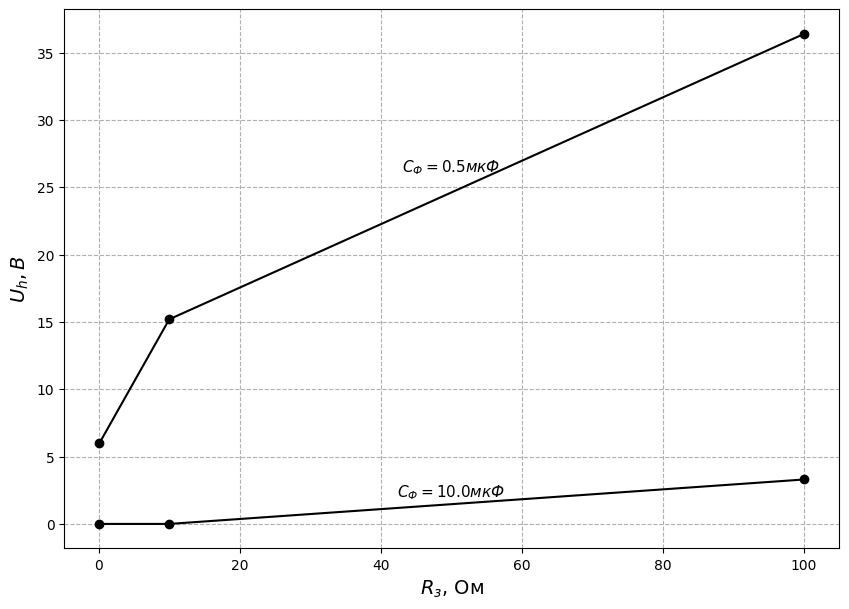

In [44]:
N = 3
Cf_values = [data2[i*(N+1), 1] for i in range(2)]
Rz_points = [data2[1 + i*(N+1) : 4 + i*(N+1), 0] for i in range(N)]
Uh_values = [data2[1 + i*(N+1) : 4 + i*(N+1), -1] for i in range(N)]

plt.figure(figsize=(10, 7))

for Cf, Rz, Uh in zip(Cf_values, Rz_points, Uh_values):
    plt.plot(Rz, Uh, marker='o', color=(0, 0, 0))

    plt.text(50, (Uh[1] + Uh[2])/2, fr"$С_Ф = {Cf:.1f} мкФ$", 
         fontsize=11, ha='center', va='bottom',
         backgroundcolor='white',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', pad=1)
         )

plt.xlabel(r"$R_з$, Ом", fontsize=14)
plt.ylabel(r"$U_{h}, В$", fontsize=14)
plt.grid(True, linestyle='dashed')
plt.show()